Complete

In [1]:
import random as rd
import pandas as pd
import seaborn as sns

class hotel:
    def __init__(self, hotel_id, number_of_rooms):
        self.hotel_id = hotel_id
        self.number_of_rooms = number_of_rooms
        self.rooms_available = number_of_rooms
        self.amenities_selection = None
        self.type = None
        self.stars = None
        self.stars_selection = []
        self.amenities = []
        self.amenities_selection = []
    def hotel_present(self):
        print("Hotel ID",self.hotel_id,"Type",self.type,"Stars",self.stars,"Number of Rooms",self.number_of_rooms,
              "Rooms available",self.rooms_available,"Amenities",self.amenities)
        
    def choosing_amenities(self):
        if self.type == 'Standard':
            self.amenities = ['Breakfast', 'Free wifi', 'Bar', 'Gym']
        elif self.type == 'Business':
            self.amenities = rd.sample(self.amenities_selection, 3)
            self.amenities.extend(['Breakfast', 'Free wifi', 'Bar', 'Gym'])
            self.stars = rd.choice(self.stars_selection)
        else:
            self.amenities = rd.sample(self.amenities_selection, 5)
            self.amenities.extend(['Breakfast', 'Free wifi', 'Bar', 'Gym', 'Conference_room', 'Premium Bar',
                                   'Concierge_service', 'Wellness_room', 'Pickup_service', 'Room service'])
            self.stars = rd.choice(self.stars_selection)
        return self.amenities, self.stars

class Standard(hotel):
    def __init__(self, hotel_id, number_of_rooms):
        super().__init__(hotel_id, number_of_rooms)
        self.type = 'Standard'
        self.amenities_selection = ['Breakfast', 'Free wifi', 'Bar', 'Gym']
        self.stars = 3

class Business(hotel):
    def __init__(self, hotel_id, number_of_rooms):
        super().__init__(hotel_id, number_of_rooms)
        self.type = 'Business'
        self.amenities_selection = ['Conference_room', 'Premium Bar', 'Concierge_service', 'Wellness_room', 
                                    'Pickup_service', 'Room service']
        self.stars_selection = [4, 5]

class Luxurious(hotel):
    def __init__(self, hotel_id, number_of_rooms):
        super().__init__(hotel_id, number_of_rooms)
        self.type = 'Luxurious'
        self.amenities_selection = ['Wellness_room', 'Pool', 'Butler_service', 'Pickup_service', 'Personal_trainer', 'Tennis_court', 'Indoor Pool', 'Premium Room service', 'Theme park']
        self.stars_selection = [6, 7]

class booking:
    def __init__(self, booking_id, group_size, pref_amenities):
        self.booking_id = booking_id
        self.group_size = group_size
        self.pref_amenities = pref_amenities

    def present(self):
        print({'Booking ID': self.booking_id, 'Group size': self.group_size, 'Amenity Preferences': self.pref_amenities})

# Populating Clients
number_of_bookings = 5000
id = []
group_size = []
pref_amenities = []
bookings = []
possible_amenities = ['Wellness_room', 'Pool', 'Butler_service', 'Pickup_service', 'Personal_trainer', 'Tennis_court', 'Indoor Pool', 'Premium Room service', 'Theme park']

for i in range(number_of_bookings):
    id.append(i)
    group_size.append(rd.choice([1, 2, 3, 4]))
    pref_amenities.append(rd.sample(possible_amenities, 3))
    new_booking = booking(id[i], group_size[i], pref_amenities[i])
    bookings.append(new_booking)

# Creating bookings into a dataframe for better visual
bookings_data = []
for booking in bookings:
    bookings_data.append({'Booking_ID': booking.booking_id, 'Group _size': booking.group_size, 'Preferred_amenities': booking.pref_amenities})
df_bookings = pd.DataFrame(bookings_data)

# Populating Hotels
number_of_hotels = 20
hotels = []
h_id = []
h_rooms = []
h_type = []

for i in range(number_of_hotels):
    h_id.append(i)
    h_rooms.append(rd.choice([100, 150, 200]))
    h_type.append(rd.choice(['Standard', 'Business', 'Luxurious']))
    if h_type[i] == 'Standard':
        new_hotel = Standard(h_id[i], h_rooms[i])
    elif h_type[i] == 'Business':
        new_hotel = Business(h_id[i], h_rooms[i])
    else:
        new_hotel = Luxurious(h_id[i], h_rooms[i])
    hotels.append(new_hotel)

for hotel in hotels:
    hotel.choosing_amenities()

# Creating hotels into a dataframe for better visual
hotel_data = []
for hotel in hotels:
    hotel_data.append({'Hotel_ID': hotel.hotel_id, 'Type': hotel.type, 'Stars': hotel.stars, 'Number_of_rooms': hotel.number_of_rooms, 'Rooms_available': hotel.rooms_available, 'Amenities': hotel.amenities})
df_hotels = pd.DataFrame(hotel_data)

In [2]:
df_bookings.head()

,Booking_ID,Group _size,Preferred_amenities
0,0,4,"[Wellness_room, Indoor Pool, Pickup_service]"
1,1,4,"[Theme park, Personal_trainer, Tennis_court]"
2,2,2,"[Indoor Pool, Wellness_room, Theme park]"
3,3,3,"[Theme park, Premium Room service, Wellness_room]"
4,4,3,"[Personal_trainer, Theme park, Tennis_court]"


In [3]:
df_hotels.head()

,Hotel_ID,Type,Stars,Number_of_rooms,Rooms_available,Amenities
0,0,Luxurious,6,200,200,"[Butler_service, Personal_trainer, Wellness_ro..."
1,1,Luxurious,6,200,200,"[Wellness_room, Indoor Pool, Personal_trainer,..."
2,2,Standard,3,100,100,"[Breakfast, Free wifi, Bar, Gym]"
3,3,Business,4,200,200,"[Conference_room, Pickup_service, Wellness_roo..."
4,4,Luxurious,7,200,200,"[Theme park, Pickup_service, Personal_trainer,..."


<Axes: xlabel='Stars', ylabel='count'>

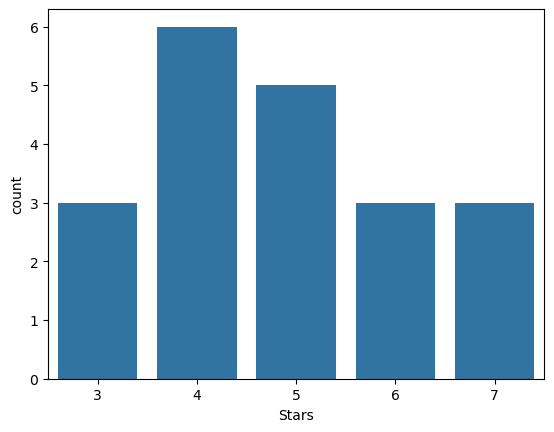

In [4]:
sns.countplot(x='Stars', data=df_hotels)

In [5]:
bookings_satisfied=0
unmatched=[]
bookings_overcapacity=0
for booking in bookings:
    booked=False
    for hotel in hotels:
        if set(booking.pref_amenities).issubset(set(hotel.amenities)) and hotel.rooms_available>=1:
            hotel.rooms_available-=1
            print(f"Booking successful! Enjoy your stay at hotel",hotel.hotel_id)
            booked=True
            bookings_satisfied+=1
            break
        elif len(set(booking.pref_amenities).intersection(set(hotel.amenities)))>=2 and hotel.rooms_available>=1:
            hotel.rooms_available-=1
            print(f"Partial match Booking, Enjoy your stay at hotel",hotel.hotel_id)
            booked=True
            bookings_satisfied+=1
            break
        elif len(set(booking.pref_amenities).intersection(set(hotel.amenities)))>=1 and hotel.rooms_available>=1:
            hotel.rooms_available-=1
            print(f"Hard match Booking, Enjoy your stay at hotel",hotel.hotel_id)
            booked=True
            bookings_satisfied+=1
            break
    if booked==False:
        unmatched.append(booking.booking_id)
#If no match, then adding it to any hotel that has room
for booking.booking_id in unmatched:
    booked=False
    for hotel in hotels:
        if hotel.rooms_available>=1:
            booked=True
            bookings_satisfied+=1
            print("Booking complete. Match based solely on room availability")
            break
    if booked==False:
        bookings_overcapacity+=1

Partial match Booking, Enjoy your stay at hotel 0
Hard match Booking, Enjoy your stay at hotel 0
Hard match Booking, Enjoy your stay at hotel 0
Partial match Booking, Enjoy your stay at hotel 0
Hard match Booking, Enjoy your stay at hotel 0
Partial match Booking, Enjoy your stay at hotel 0
Partial match Booking, Enjoy your stay at hotel 0
Partial match Booking, Enjoy your stay at hotel 0
Partial match Booking, Enjoy your stay at hotel 0
Booking successful! Enjoy your stay at hotel 0
Hard match Booking, Enjoy your stay at hotel 0
Partial match Booking, Enjoy your stay at hotel 0
Booking successful! Enjoy your stay at hotel 0
Partial match Booking, Enjoy your stay at hotel 0
Booking successful! Enjoy your stay at hotel 0
Booking successful! Enjoy your stay at hotel 0
Hard match Booking, Enjoy your stay at hotel 0
Booking successful! Enjoy your stay at hotel 0
Booking successful! Enjoy your stay at hotel 0
Partial match Booking, Enjoy your stay at hotel 0
Partial match Booking, Enjoy your

In [6]:
# Updating the df_hotels after the bookings have been processed.

print(f"A total of",bookings_satisfied,"has been successfully processed")
print(f"We have an overcapacity of ",bookings_overcapacity)
hotel_data_updated = []
for hotel in hotels:
    hotel_data_updated.append({'Hotel_ID': hotel.hotel_id, 'Type': hotel.type, 'Stars': hotel.stars, 'Number_of_rooms': hotel.number_of_rooms, 'Rooms_available': hotel.rooms_available, 'Amenities': hotel.amenities})
df_hotels_updated = pd.DataFrame(hotel_data_updated)
df_hotels_updated.head(30)

A total of 5000 has been successfully processed
We have an overcapacity of  0


,Hotel_ID,Type,Stars,Number_of_rooms,Rooms_available,Amenities
0,0,Luxurious,6,200,0,"[Butler_service, Personal_trainer, Wellness_ro..."
1,1,Luxurious,6,200,0,"[Wellness_room, Indoor Pool, Personal_trainer,..."
2,2,Standard,3,100,100,"[Breakfast, Free wifi, Bar, Gym]"
3,3,Business,4,200,0,"[Conference_room, Pickup_service, Wellness_roo..."
4,4,Luxurious,7,200,0,"[Theme park, Pickup_service, Personal_trainer,..."
5,5,Business,5,150,0,"[Conference_room, Pickup_service, Concierge_se..."
6,6,Standard,3,150,150,"[Breakfast, Free wifi, Bar, Gym]"
7,7,Luxurious,6,100,0,"[Indoor Pool, Butler_service, Theme park, Pers..."
8,8,Luxurious,7,200,0,"[Wellness_room, Premium Room service, Theme pa..."
9,9,Luxurious,7,200,0,"[Tennis_court, Pool, Premium Room service, Ind..."


Random booking selection

#Normally the program would request user input, thus checking if it is a valid input etc. Yet now we will just take a random ID.

In [7]:
#Check user input

check=False
while check==False:
    check=False
    x=int(input('Please give a number from 1 to the number of bookings'))
    print("Number selected",x)
    if ((x-1) < 0 or x > number_of_hotels):
        raise ValueError("Please give a number within the designated interval")
    else:
        check=True

In [8]:
# Search for a hotel eligible for upgrade to next Category
x=rd.choice(h_id)
print('Selected number',x)
try:
    for hotel in hotels:
        if hotel.hotel_id == x:
            hotel.hotel_present()
            if hotel.type=='Standard':
                print('Upgrade to Business')
                hotel.type='Business'
                hotel.stars=hotel.stars+2
                hotel.amenities = rd.sample(['Conference_room', 'Premium Bar', 
                                             'Concierge_service', 'Wellness_room', 'Pickup_service', 'Room service'], 3)
                break
            elif hotel.type=='Business':
                print('Upgrade to Luxurious for Hotel number',x+1)
                hotel.type='Luxurious'
                hotel.stars=hotel.stars+2
                hotel.amenities = rd.sample(['Wellness_room', 'Pool', 'Butler_service', 'Pickup_service',
                                              'Personal_trainer', 'Tennis_court', 'Indoor Pool', 
                                              'Premium Room service', 'Theme park'], 5)
                break
            else: raise ValueError("Hotel is already a Luxurious resort")
    hotel.hotel_present()
except ValueError as error:
    print('Problem:',error)



Selected number 16
Hotel ID 16 Type Business Stars 5 Number of Rooms 100 Rooms available 0 Amenities ['Wellness_room', 'Concierge_service', 'Premium Bar', 'Breakfast', 'Free wifi', 'Bar', 'Gym']
Upgrade to Luxurious for Hotel number 17
Hotel ID 16 Type Luxurious Stars 7 Number of Rooms 100 Rooms available 0 Amenities ['Tennis_court', 'Butler_service', 'Pool', 'Theme park', 'Indoor Pool']
